In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

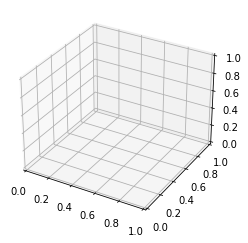

In [29]:
#3D graph test
fig = plt.figure()
ax = plt.axes(projection='3d')

In [124]:
#plot
iniPos = [0,0,0,0]
endPos = [2,1,0,4]

droneKey = np.array([iniPos, [2,4,1.5,1], [5,1,1.2,2], [1,3,4,3], endPos]) #array of positions for a drone
droneKey



array([[0. , 0. , 0. , 0. ],
       [2. , 4. , 1.5, 1. ],
       [5. , 1. , 1.2, 2. ],
       [1. , 3. , 4. , 3. ],
       [2. , 1. , 0. , 4. ]])

In [41]:
xdata = droneKey[:,0]
ydata = droneKey[:,1]
zdata = droneKey[:,2]
tdata = droneKey[:,3]

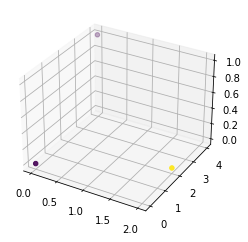

In [43]:
ax = plt.axes(projection='3d')

ax.scatter3D(xdata, ydata, zdata, c=xdata)

In [88]:
#extrapolation function
def extrap(p1, p2, steps = 5):
    '''linear extrapolation between two points with a specified amount of steps'''
    pointList = []
    gap = 1/steps
    k = 0
    for i in range(steps):
        point = k*(p2 - p1) + p1
        k += gap
        pointList.append(point)
    return pointList
#output without last point to allow for 'stacking'
    
    

In [148]:
extrap(0,5, 10)

[0, 0.5, 1.0, 1.5000000000000002, 2.0, 2.5, 3.0, 3.5, 3.9999999999999996, 4.5]

In [149]:
#sets of coords in and list out
droneKey


array([[0. , 0. , 0. , 0. ],
       [2. , 4. , 1.5, 1. ],
       [5. , 1. , 1.2, 2. ],
       [1. , 3. , 4. , 3. ],
       [2. , 1. , 0. , 4. ]])

In [100]:
#only does 2 points as of now...#don't run
def coordExtrap(fullData):
    length = fullData.shape[0]
    
    xdata = fullData[:,0]
    ydata = fullData[:,1]
    zdata = fullData[:,2]
    tadta = fullData[:,3]
    
    xList = extrap(xdata[0], xdata[1])
    yList = extrap(ydata[0], ydata[1])
    zList = extrap(zdata[0], zdata[1])
    tList = extrap(tdata[0], tdata[1])
    newData = np.array([xList, yList, zList, tList])
    return newData

In [154]:
coordExtrap(droneKey) #xs, yz, zs, ts separately

array([[list([0.0, 0.4, 0.8, 1.2000000000000002, 1.6]), 5,
        list([2.0, 2.6, 3.2, 3.8000000000000003, 4.4]), 5,
        list([5.0, 4.2, 3.4, 2.5999999999999996, 1.7999999999999998]), 5,
        list([1.0, 1.2, 1.4, 1.6, 1.8]), 5],
       [list([0.0, 0.8, 1.6, 2.4000000000000004, 3.2]), 5,
        list([4.0, 3.4, 2.8, 2.1999999999999997, 1.5999999999999996]), 5,
        list([1.0, 1.4, 1.8, 2.2, 2.6]), 5,
        list([3.0, 2.6, 2.2, 1.7999999999999998, 1.4]), 5],
       [list([0.0, 0.30000000000000004, 0.6000000000000001, 0.9000000000000001, 1.2000000000000002]),
        5, list([1.5, 1.44, 1.38, 1.3199999999999998, 1.26]), 5,
        list([1.2, 1.7599999999999998, 2.32, 2.88, 3.4399999999999995]),
        5, list([4.0, 3.2, 2.4, 1.5999999999999996, 0.7999999999999998]),
        5],
       [list([0.0, 0.2, 0.4, 0.6000000000000001, 0.8]), 5,
        list([1.0, 1.2, 1.4, 1.6, 1.8]), 5,
        list([2.0, 2.2, 2.4, 2.6, 2.8]), 5,
        list([3.0, 3.2, 3.4, 3.6, 3.8]), 5]], dtype=o

In [155]:
#stacks all keyframes and extrapolates
def coordExtrap(fullData, steps = 5):
    length = fullData.shape[0]
    
    xdata = fullData[:,0]
    ydata = fullData[:,1]
    zdata = fullData[:,2]
    tdata = fullData[:,3]
    
    n=0
    xList = []
    yList = []
    zList = []
    tList = []
    
    for i in range(length - 1):
        xList += (extrap(xdata[i], xdata[i+1], steps))
        yList += (extrap(ydata[i], ydata[i+1], steps))
        zList += (extrap(zdata[i], zdata[i+1], steps))
        tList += (extrap(tdata[i], tdata[i+1], steps))
        
    newData = np.array([xList, yList, zList, tList])
    return newData

In [156]:
coordExtrap(droneKey)

array([[0.  , 0.4 , 0.8 , 1.2 , 1.6 , 2.  , 2.6 , 3.2 , 3.8 , 4.4 , 5.  ,
        4.2 , 3.4 , 2.6 , 1.8 , 1.  , 1.2 , 1.4 , 1.6 , 1.8 ],
       [0.  , 0.8 , 1.6 , 2.4 , 3.2 , 4.  , 3.4 , 2.8 , 2.2 , 1.6 , 1.  ,
        1.4 , 1.8 , 2.2 , 2.6 , 3.  , 2.6 , 2.2 , 1.8 , 1.4 ],
       [0.  , 0.3 , 0.6 , 0.9 , 1.2 , 1.5 , 1.44, 1.38, 1.32, 1.26, 1.2 ,
        1.76, 2.32, 2.88, 3.44, 4.  , 3.2 , 2.4 , 1.6 , 0.8 ],
       [0.  , 0.2 , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.4 , 1.6 , 1.8 , 2.  ,
        2.2 , 2.4 , 2.6 , 2.8 , 3.  , 3.2 , 3.4 , 3.6 , 3.8 ]])

In [162]:
#plot function
def plotIt(i):
    x = i[0]
    y = i[1]
    z = i[2]
    
    ax = plt.axes(projection='3d')

    ax.scatter3D(x, y, z, color = "r")

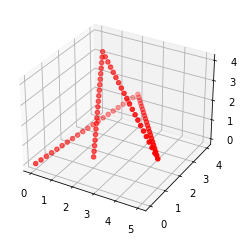

In [163]:
plotIt(coordExtrap(droneKey, 20))

In [164]:
def multiPlot(inputList):
    ax = plt.axes(projection='3d')
    n = inputList.shape[0]
    color=iter(cm.rainbow(np.linspace(0,1,n+1)))

    for i in inputList:
        x = i[0]
        y = i[1]
        z = i[2]
        c = next(color)
        ax.scatter3D(x, y, z, c)  

In [165]:
droneKey


array([[0. , 0. , 0. , 0. ],
       [2. , 4. , 1.5, 1. ],
       [5. , 1. , 1.2, 2. ],
       [1. , 3. , 4. , 3. ],
       [2. , 1. , 0. , 4. ]])

In [166]:
droneKey1 = droneKey

In [171]:
droneKey2 = np.array([[0,1,1,0],
                      [2,3,1,1],
                      [2,3,4,3]])

In [168]:
droneList = [droneKey1, droneKey2]

In [177]:
example = list(map(coordExtrap, droneList))

In [178]:
example

[array([[0.  , 0.4 , 0.8 , 1.2 , 1.6 , 2.  , 2.6 , 3.2 , 3.8 , 4.4 , 5.  ,
         4.2 , 3.4 , 2.6 , 1.8 , 1.  , 1.2 , 1.4 , 1.6 , 1.8 ],
        [0.  , 0.8 , 1.6 , 2.4 , 3.2 , 4.  , 3.4 , 2.8 , 2.2 , 1.6 , 1.  ,
         1.4 , 1.8 , 2.2 , 2.6 , 3.  , 2.6 , 2.2 , 1.8 , 1.4 ],
        [0.  , 0.3 , 0.6 , 0.9 , 1.2 , 1.5 , 1.44, 1.38, 1.32, 1.26, 1.2 ,
         1.76, 2.32, 2.88, 3.44, 4.  , 3.2 , 2.4 , 1.6 , 0.8 ],
        [0.  , 0.2 , 0.4 , 0.6 , 0.8 , 1.  , 1.2 , 1.4 , 1.6 , 1.8 , 2.  ,
         2.2 , 2.4 , 2.6 , 2.8 , 3.  , 3.2 , 3.4 , 3.6 , 3.8 ]]),
 array([[0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.2, 2.4, 2.6, 2.8, 3. , 2.8, 2.6,
         2.4, 2.2],
        [1. , 1.4, 1.8, 2.2, 2.6, 3. , 2.8, 2.6, 2.4, 2.2, 2. , 2.2, 2.4,
         2.6, 2.8],
        [1. , 1. , 1. , 1. , 1. , 1. , 1.6, 2.2, 2.8, 3.4, 4. , 4. , 4. ,
         4. , 4. ],
        [0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4,
         2.6, 2.8]])]

AttributeError: 'list' object has no attribute 'shape'

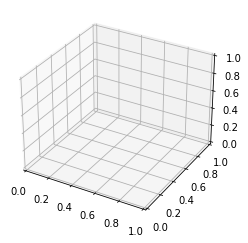

In [179]:
multiPlot(example)